In [1]:
import pandas as pd
import pathlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from typing import Tuple

In [2]:
ls ~/data/2D_recovery_studies/increased_covmatrix

all_2D/        s_0.3/  s_0.7/   s_0.86/  s_0.94/  xyz_blowup/
higher_stats/  s_0.4/  s_0.8/   s_0.88/  s_0.96/  y_blowup/
s_0.1/         s_0.5/  s_0.82/  s_0.9/   s_0.98/  z_blowup/
s_0.2/         s_0.6/  s_0.84/  s_0.92/  s_1/


In [3]:
s = 0.98
higher_stats = False
use_custom_prefix = True
custom_prefix = 'xyz_blowup'

prefix_folder = ''

if higher_stats:
    prefix_folder = 'higher_stats'
elif use_custom_prefix:
    prefix_folder = custom_prefix

io_folder = (
    str(pathlib.Path.home())
    + '/data/2D_recovery_studies/increased_covmatrix/'
    + prefix_folder
    + '/s_'
    + str(s)
    + '/')

input_file = io_folder + 'truthMatchedDaVinciLog.h5' 

In [4]:
save_plots = False

In [5]:
## Create plots directory, if missing
plots_dir = (str(pathlib.Path.home())
                  + '/vertex-reconstruction-studies/'
                  + 'plots/'
                  + 'studies_on_truth_matched_davinci_logs/'
                  + '2D_vs_3D_bias/'
)
pathlib.Path(plots_dir).mkdir(parents=True, exist_ok=True)

In [6]:
color_3D = 'tab:blue'
color_2D = 'tab:orange'

# Import data

In [7]:
df_events = pd.read_hdf(input_file, key='LHCbMC_Lb')
df_events

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,pim_posMomCovMatrix_3_5,pim_posMomCovMatrix_3_6,pim_posMomCovMatrix_4_4,pim_posMomCovMatrix_4_5,pim_posMomCovMatrix_4_6,pim_posMomCovMatrix_5_5,pim_posMomCovMatrix_5_6,pim_posMomCovMatrix_6_6,match_index,mismatch_perc
0,1.674753,0.053259,0.004623,461.983261,-78.247981,6504.222043,1.6747,0.0532,0.0037,4601.051416,...,3.142560e+03,3.145090e+03,17.4188,-2.138120e+02,-2.140240e+02,73162.6,73220.9,73279.2,0,0.000030
1,0.880395,-0.130333,15.654301,209.545799,199.243538,4381.083975,0.8804,-0.1302,15.6547,745.277623,...,9.031320e+03,9.376810e+03,43.3318,3.264650e+01,3.425470e+01,31859.4,33076.1,34339.4,1,0.000035
2,0.893069,-0.210212,27.346294,84.953310,-116.199707,5557.096303,0.8930,-0.2103,27.3459,627.274341,...,-2.886080e+04,-2.887930e+04,787.3740,-2.837230e+04,-2.839180e+04,1099220.0,1099920.0,1100620.0,4,0.000041
3,0.605712,-0.203051,22.148046,-204.901648,18.916848,3808.053578,0.6057,-0.2032,22.1485,-2775.608970,...,2.693930e+04,2.696010e+04,90.1864,5.198510e+03,5.202890e+03,669476.0,669988.0,670499.0,9,0.000034
4,0.636031,-0.090822,-65.799311,-207.686722,152.674077,7297.794399,0.6356,-0.0907,-65.7961,-1549.606044,...,-1.309440e+04,-1.310540e+04,201.6090,6.041500e+03,6.048110e+03,340592.0,340879.0,341166.0,11,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.102002,-0.738529,67.994845,416.734808,-71.567410,6050.924992,1.1019,-0.7389,67.9972,778.236521,...,-1.649730e+04,-1.656760e+04,20.9045,-1.465700e+03,-1.472000e+03,157080.0,157748.0,158419.0,1823,26.018788
1231,1.102002,-0.738529,67.994845,416.734808,-71.567410,6050.924992,1.1019,-0.7389,67.9972,778.236521,...,-3.294190e+03,-3.309560e+03,15.1408,-5.478470e+02,-5.504880e+02,32776.9,32928.6,33080.9,650,27.920465
1232,1.102002,-0.738529,67.994845,416.734808,-71.567410,6050.924992,1.1019,-0.7389,67.9972,778.236521,...,4.624110e+01,4.617740e+01,34.6406,-3.533540e+03,-3.528700e+03,423785.0,423201.0,422617.0,8664,23.536421
1233,0.759246,-0.783205,68.533907,-20.006221,-456.343834,6363.973976,0.7591,-0.7829,68.5325,-4289.573985,...,2.821250e+06,2.826850e+06,525617.0000,-8.721530e+06,-8.738940e+06,145133000.0,145421000.0,145709000.0,10386,0.000040


# $\Lambda^0$ decay vertex bias

In [8]:
def plot_2D_vs_3D_histograms(
    df: pd.DataFrame, ## Full DataFrame
    series: pd.Series, ## Series built from df columns. May be a column itself
    axis_label: str,
    plot_title: str,
    file_name: str,
    binning: int,
    boundaries: Tuple[float],
    log_scale: bool = False,
    scientific_notation: bool = False,
    normalized: bool = True
):
    ## 3D-converged events
    plt.hist(
        series.loc[df['status'] == 'Converged'],
        bins=binning,
        range=boundaries,
        label="3D algorithm",
        histtype='stepfilled',
        edgecolor=color_3D,
        color=mcolors.to_rgba(color_3D, alpha=0.05),
        density=normalized
    )
    
    ## Failed
    plt.hist(
        series.loc[df['status_2D'] == 'Converged2D'],
         bins=binning,
         range=boundaries,
         label="2D algorithm",
         histtype='stepfilled',
         edgecolor=color_2D,
         color=mcolors.to_rgba(color_2D, alpha=0.05),
         density=normalized
    )
    
    plt.grid()
    plt.xlabel(axis_label)
    plt.title(plot_title)
    
    if log_scale:
        plt.yscale('log')

    if normalized:
        plt.ylabel("Probability density")
    else:
        plt.ylabel("Events")
    
    plt.legend()
    
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    if save_plots:
        plt.savefig(plots_dir + file_name + '.pdf', bbox_inches='tight')
    
    plt.show()

In [9]:
sum(df_events['status_2D'] == 'Converged2D')

180

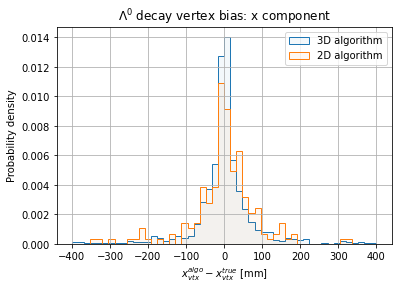

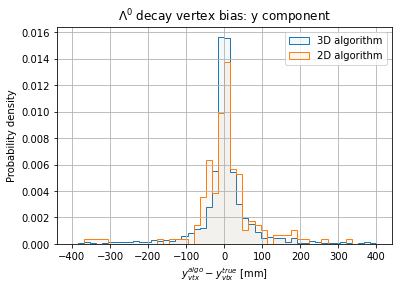

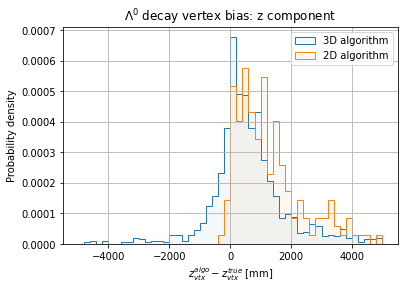

In [10]:
bias_boundary_dictionary = {
    'x': (-400,400),
    'y': (-400,400),
    'z': (-5000,5000),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'L_ENDVERTEX_' + comp.upper()
    true_feature = 'MCTRUTH_L_ENDVERTEX_' + comp.upper()

    plot_args = {
        'axis_label': '$' + comp + '^{algo}_{vtx} - ' + comp + '^{true}_{vtx}$ [mm]',
        'plot_title': '$\Lambda^0$ decay vertex bias: ' + comp + " component",
        'file_name': 'Lambda_endvertex_' + comp + '_bias',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True
    }

    plot_2D_vs_3D_histograms(
        df_events,
        df_events[fitted_feature] - df_events[true_feature],
        **plot_args)

# $\tilde{\chi^2}_\text{vtx}$

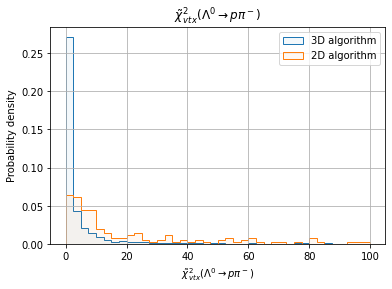

In [11]:
plot_args = {
    'axis_label': r'$\tilde\chi^2_{vtx} (\Lambda^0 \rightarrow p \pi^-)$',
    'plot_title': r'$\tilde\chi^2_{vtx} (\Lambda^0 \rightarrow p \pi^-)$',
    'file_name': 'Lambda_vertex_chi2',
    'binning': 40,
    'boundaries': [0,100],
    'log_scale': False,
    'scientific_notation': False,
    'normalized': True
}

plot_2D_vs_3D_histograms(
    df_events,
    df_events['L_VFASPF_CHI2_VDOF'],
    **plot_args)

In [12]:
df_events.loc[df_events['status'] == 'Converged', 'L_VFASPF_CHI2_VDOF'].median()

1.0220634558657928

In [13]:
df_events.loc[df_events['status_2D'] == 'Converged2D', 'L_VFASPF_CHI2_VDOF'].median()

15.615313071281523

# Momenta

## VF

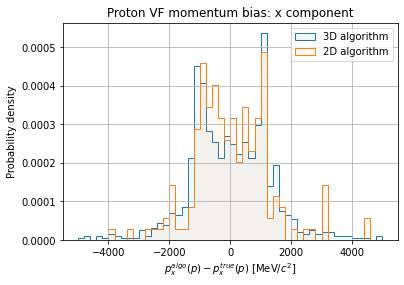

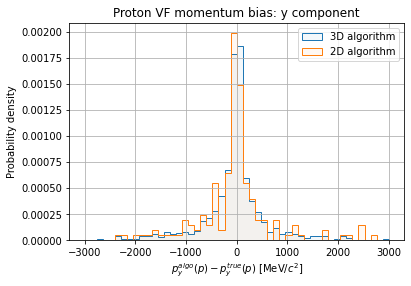

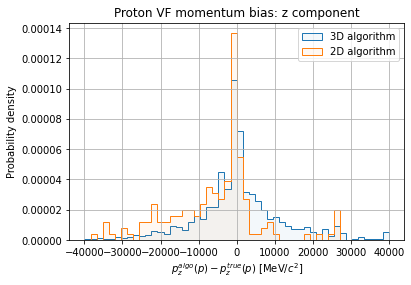

In [14]:
bias_boundary_dictionary = {
    'x': (-5000,5000),
    'y': (-3000,3000),
    'z': (-40000,40000),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'p_P' + comp.upper()
    true_feature = 'MCTRUTH_p_P' + comp.upper()

    plot_args = {
        'axis_label': '$p_' + comp + '^{algo}(p) - p_' + comp + '^{true}(p)$ [MeV/$c^2$]',
        'plot_title': 'Proton VF momentum bias: ' + comp + " component",
        'file_name': 'proton_p' + comp + '_bias',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True
    }

    plot_2D_vs_3D_histograms(
        df_events,
        df_events[fitted_feature] - df_events[true_feature],
        **plot_args)

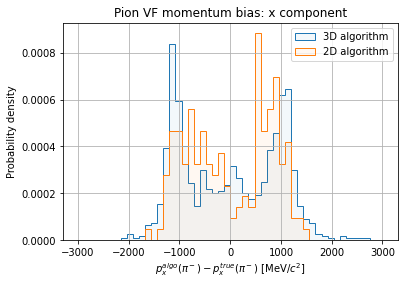

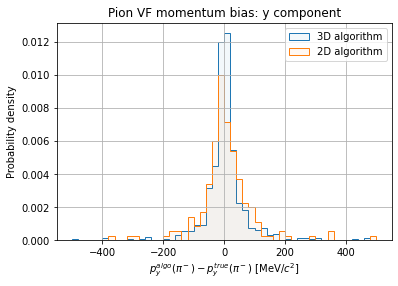

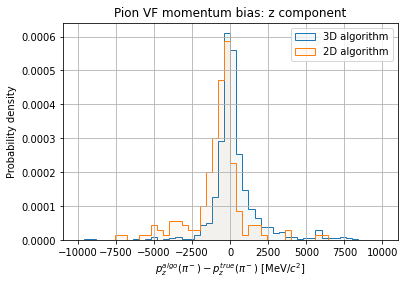

In [15]:
bias_boundary_dictionary = {
    'x': (-3000,3000),
    'y': (-500,500),
    'z': (-10000,10000),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'pim_P' + comp.upper()
    true_feature = 'MCTRUTH_pim_P' + comp.upper()

    plot_args = {
        'axis_label': '$p_' + comp + '^{algo}(\pi^-) - p_' + comp + '^{true}(\pi^-)$ [MeV/$c^2$]',
        'plot_title': 'Pion VF momentum bias: ' + comp + " component",
        'file_name': 'pion_p' + comp + '_bias',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True
    }

    plot_2D_vs_3D_histograms(
        df_events,
        df_events[fitted_feature] - df_events[true_feature],
        **plot_args)

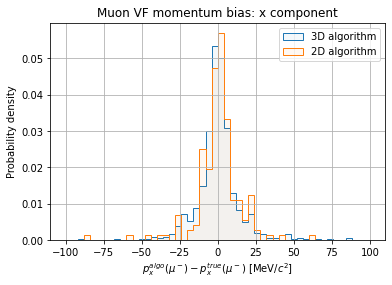

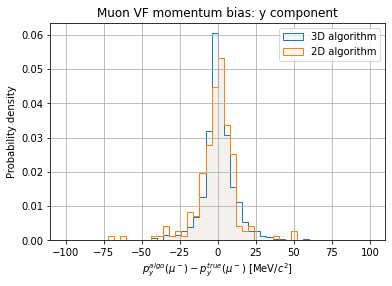

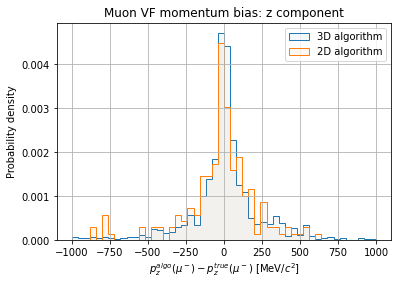

In [16]:
bias_boundary_dictionary = {
    'x': (-100,100),
    'y': (-100,100),
    'z': (-1000,1000),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'mum_P' + comp.upper()
    true_feature = 'MCTRUTH_mum_P' + comp.upper()

    plot_args = {
        'axis_label': '$p_' + comp + '^{algo}(\mu^-) - p_' + comp + '^{true}(\mu^-)$ [MeV/$c^2$]',
        'plot_title': 'Muon VF momentum bias: ' + comp + " component",
        'file_name': 'mum_p' + comp + '_bias',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True
    }

    plot_2D_vs_3D_histograms(
        df_events,
        df_events[fitted_feature] - df_events[true_feature],
        **plot_args)

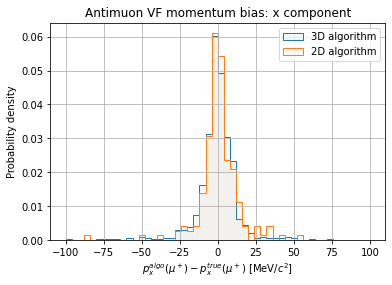

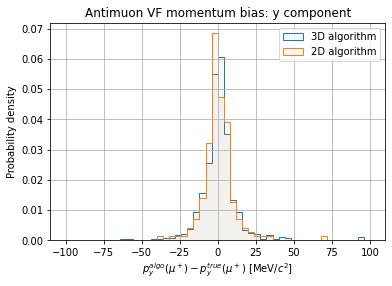

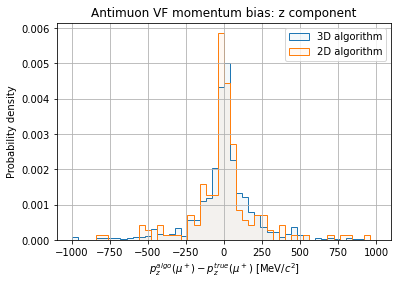

In [17]:
bias_boundary_dictionary = {
    'x': (-100,100),
    'y': (-100,100),
    'z': (-1000,1000),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'mup_P' + comp.upper()
    true_feature = 'MCTRUTH_mup_P' + comp.upper()

    plot_args = {
        'axis_label': '$p_' + comp + '^{algo}(\mu^+) - p_' + comp + '^{true}(\mu^+)$ [MeV/$c^2$]',
        'plot_title': 'Antimuon VF momentum bias: ' + comp + " component",
        'file_name': 'mup_p' + comp + '_bias',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True
    }

    plot_2D_vs_3D_histograms(
        df_events,
        df_events[fitted_feature] - df_events[true_feature],
        **plot_args)

## DTF

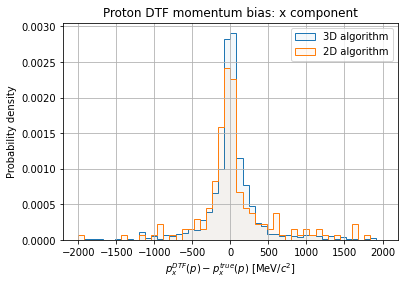

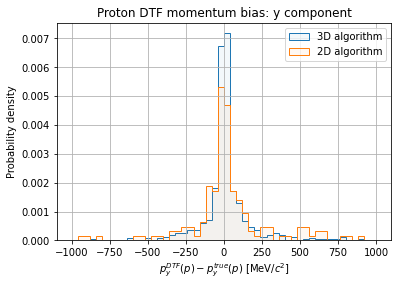

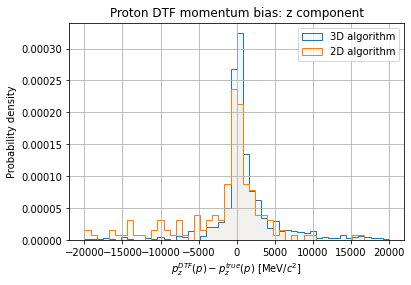

In [18]:
bias_boundary_dictionary = {
    'x': (-2000,2000),
    'y': (-1000,1000),
    'z': (-20000,20000),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'DTF_FixJPsi_p_P' + comp.upper()
    true_feature = 'MCTRUTH_p_P' + comp.upper()

    plot_args = {
        'axis_label': '$p_' + comp + '^{DTF}(p) - p_' + comp + '^{true}(p)$ [MeV/$c^2$]',
        'plot_title': 'Proton DTF momentum bias: ' + comp + " component",
        'file_name': 'proton_p' + comp + '_DTF_bias',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True
    }

    plot_2D_vs_3D_histograms(
        df_events,
        df_events[fitted_feature] - df_events[true_feature],
        **plot_args)

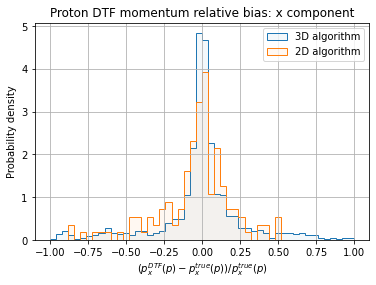

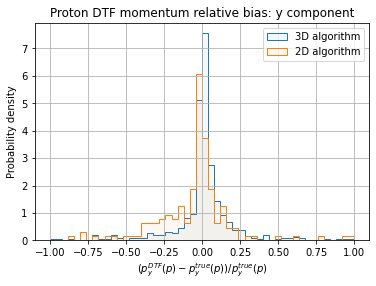

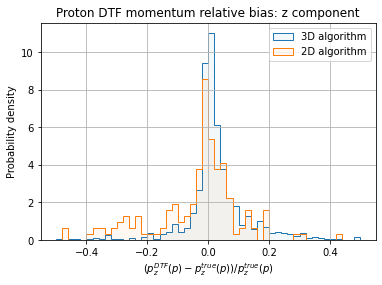

In [19]:
bias_boundary_dictionary = {
    'x': (-1,1),
    'y': (-1,1),
    'z': (-0.5,0.5),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'DTF_FixJPsi_p_P' + comp.upper()
    true_feature = 'MCTRUTH_p_P' + comp.upper()

    plot_args = {
        'axis_label': '$(p_' + comp + '^{DTF}(p) - p_' + comp + '^{true}(p))/p_' + comp + '^{true}(p)$',
        'plot_title': 'Proton DTF momentum relative bias: ' + comp + " component",
        'file_name': 'proton_p' + comp + '_DTF_bias_rel',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True
    }

    plot_2D_vs_3D_histograms(
        df_events,
        (df_events[fitted_feature] - df_events[true_feature])/df_events[true_feature],
        **plot_args)

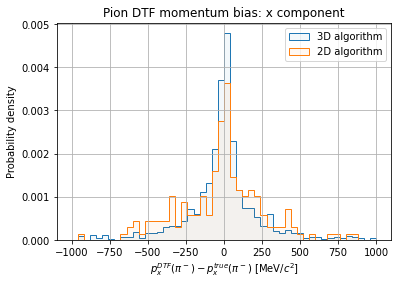

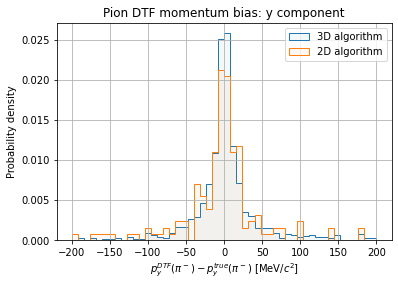

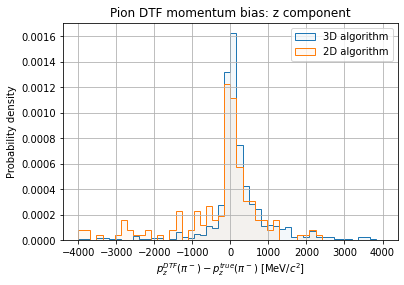

In [20]:
bias_boundary_dictionary = {
    'x': (-1000,1000),
    'y': (-200,200),
    'z': (-4000,4000),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'DTF_FixJPsi_pim_P' + comp.upper()
    true_feature = 'MCTRUTH_pim_P' + comp.upper()

    plot_args = {
        'axis_label': '$p_' + comp + '^{DTF}(\pi^-) - p_' + comp + '^{true}(\pi^-)$ [MeV/$c^2$]',
        'plot_title': 'Pion DTF momentum bias: ' + comp + " component",
        'file_name': 'pion_p' + comp + '_DTF_bias',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True
    }

    plot_2D_vs_3D_histograms(
        df_events,
        df_events[fitted_feature] - df_events[true_feature],
        **plot_args)

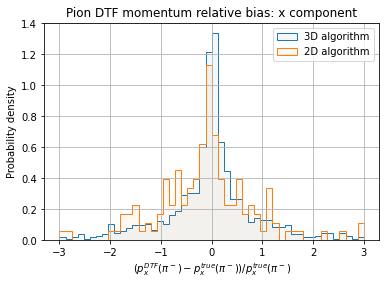

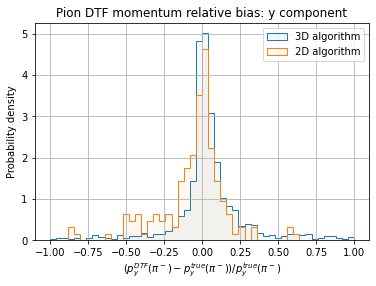

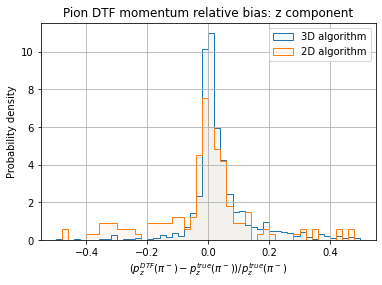

In [21]:
bias_boundary_dictionary = {
    'x': (-3,3),
    'y': (-1,1),
    'z': (-0.5,0.5),
}

for comp in ['x', 'y', 'z']:
    fitted_feature = 'DTF_FixJPsi_pim_P' + comp.upper()
    true_feature = 'MCTRUTH_pim_P' + comp.upper()

    plot_args = {
        'axis_label': '$(p_' + comp + '^{DTF}(\pi^-) - p_' + comp + '^{true}(\pi^-))/p_' + comp + '^{true}(\pi^-)$',
        'plot_title': 'Pion DTF momentum relative bias: ' + comp + " component",
        'file_name': 'pion_p' + comp + '_DTF_bias_rel',
        'binning': 50,
        'boundaries': bias_boundary_dictionary[comp],
        'log_scale': False,
        'scientific_notation': False,
        'normalized': True
    }

    plot_2D_vs_3D_histograms(
        df_events,
        (df_events[fitted_feature] - df_events[true_feature])/df_events[true_feature],
        **plot_args)

In [22]:
sum(df_events['status_2D'] == 'Converged2D')

180

In [23]:
sum(df_events['status'] == 'Converged')

1044